In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("car_data.csvd")

FileNotFoundError: [Errno 2] No such file or directory: 'car_data.csvd'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [ ]:
df.describe()

,User ID,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.106000,72689.000000,0.402000
std,288.819436,10.707073,34488.341867,0.490547
min,1.000000,18.000000,15000.000000,0.000000
25%,250.750000,32.000000,46375.000000,0.000000
50%,500.500000,40.000000,72000.000000,0.000000
75%,750.250000,48.000000,90000.000000,1.000000
max,1000.000000,63.000000,152500.000000,1.000000


In [ ]:
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [ ]:
df.groupby('Gender')['Gender'].count()

Gender
Female    516
Male      484
Name: Gender, dtype: int64

<AxesSubplot: ylabel='Gender'>

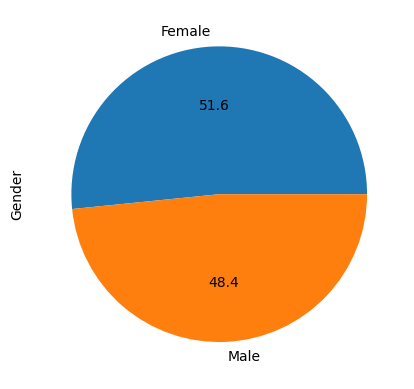

In [ ]:
df.groupby('Gender')['Gender'].count().plot(kind='pie',autopct="%.1f")

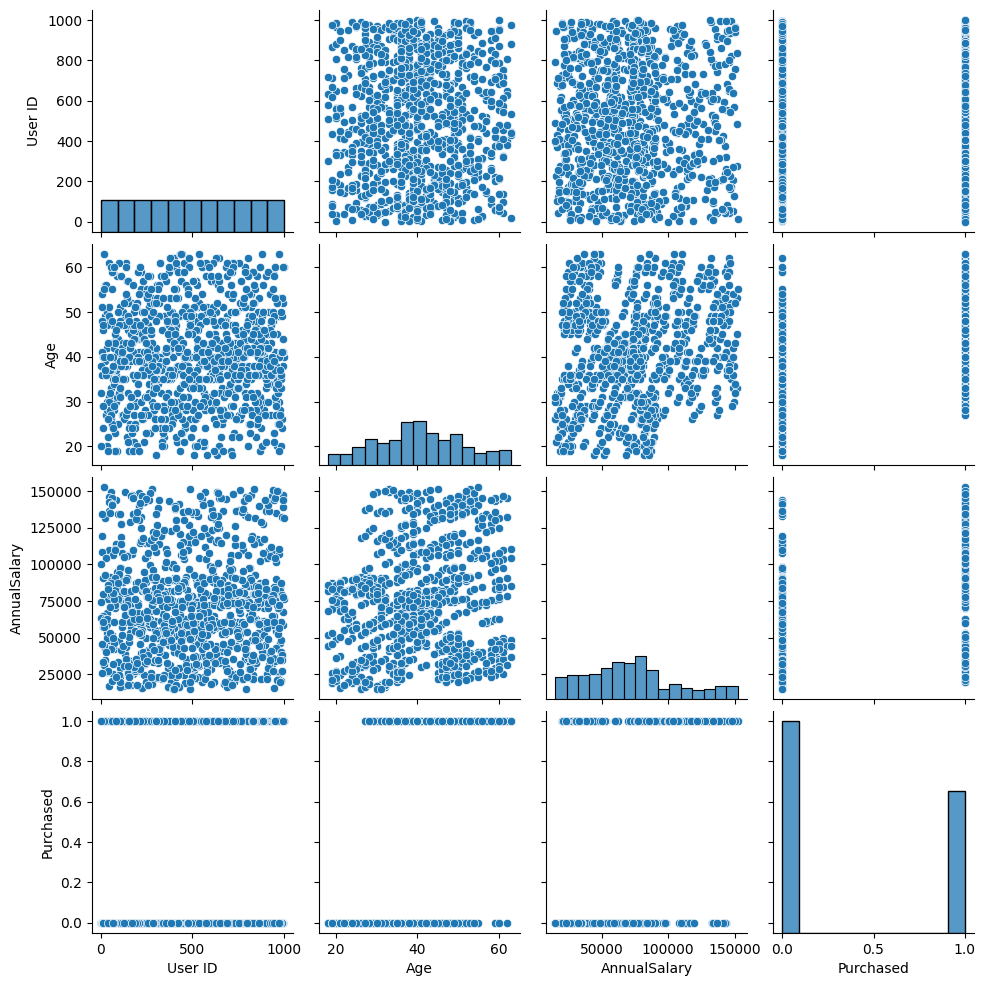

In [ ]:
sns.pairplot(df)

C:\Users\anuku\AppData\Local\Temp\ipykernel_14512\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<AxesSubplot: >

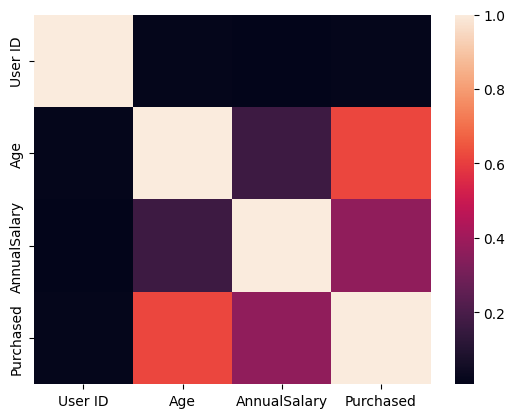

In [ ]:
sns.heatmap(df.corr())

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
df['gender'] = le.fit_transform(df['Genderd'])

In [ ]:
df.drop(columns='Gender',axis=1,inplace =True)

In [ ]:
df.head()

,User ID,Age,AnnualSalary,Purchased,gender
0,385,35,20000,0,1
1,681,40,43500,0,1
2,353,49,74000,0,1
3,895,40,107500,1,1
4,661,25,79000,0,1


In [ ]:
df.columns.tolist()

['User ID', 'Age', 'AnnualSalary', 'Purchased', 'gender']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X= df[[ 'Age', 'AnnualSalary', 'gender']]
Y = df['Purchased']

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.2,random_state=0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc= DecisionTreeClassifier()

In [ ]:
dtc.fit(X_train,Y_train)

DecisionTreeClassifier()

In [ ]:
pred = dtc.predict(X_test)

In [ ]:
dtc.score(X_train,Y_train)

1.0

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
print(confusion_matrix(Y_test,pred))
print(classification_report(Y_test,pred))


[[427  48]
 [ 81 244]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       475
           1       0.84      0.75      0.79       325

    accuracy                           0.84       800
   macro avg       0.84      0.82      0.83       800
weighted avg       0.84      0.84      0.84       800



In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=200)

In [ ]:
rfc.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=200)

In [ ]:
prediction = rfc.predict(X_test)

In [ ]:
print(confusion_matrix(Y_test,prediction))
print(classification_report(Y_test,prediction))

[[447  28]
 [ 55 270]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       475
           1       0.91      0.83      0.87       325

    accuracy                           0.90       800
   macro avg       0.90      0.89      0.89       800
weighted avg       0.90      0.90      0.90       800



In [ ]:
from sklearn.tree import plot_tree

[Text(0.5454545454545454, 0.95, 'x[0] <= 46.5\ngini = 0.474\nsamples = 200\nvalue = [123, 77]'),
 Text(0.25757575757575757, 0.85, 'x[1] <= 87750.0\ngini = 0.278\nsamples = 138\nvalue = [115, 23]'),
 Text(0.18181818181818182, 0.75, 'x[0] <= 45.5\ngini = 0.086\nsamples = 111\nvalue = [106, 5]'),
 Text(0.12121212121212122, 0.65, 'x[1] <= 74000.0\ngini = 0.055\nsamples = 106\nvalue = [103, 3]'),
 Text(0.09090909090909091, 0.55, 'gini = 0.0\nsamples = 75\nvalue = [75, 0]'),
 Text(0.15151515151515152, 0.55, 'x[1] <= 80250.0\ngini = 0.175\nsamples = 31\nvalue = [28, 3]'),
 Text(0.12121212121212122, 0.45, 'x[1] <= 77750.0\ngini = 0.278\nsamples = 18\nvalue = [15, 3]'),
 Text(0.06060606060606061, 0.35, 'x[0] <= 42.5\ngini = 0.165\nsamples = 11\nvalue = [10, 1]'),
 Text(0.030303030303030304, 0.25, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.09090909090909091, 0.25, 'x[0] <= 43.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.06060606060606061, 0.15, 'gini = 0.0\nsamples = 1\nvalue

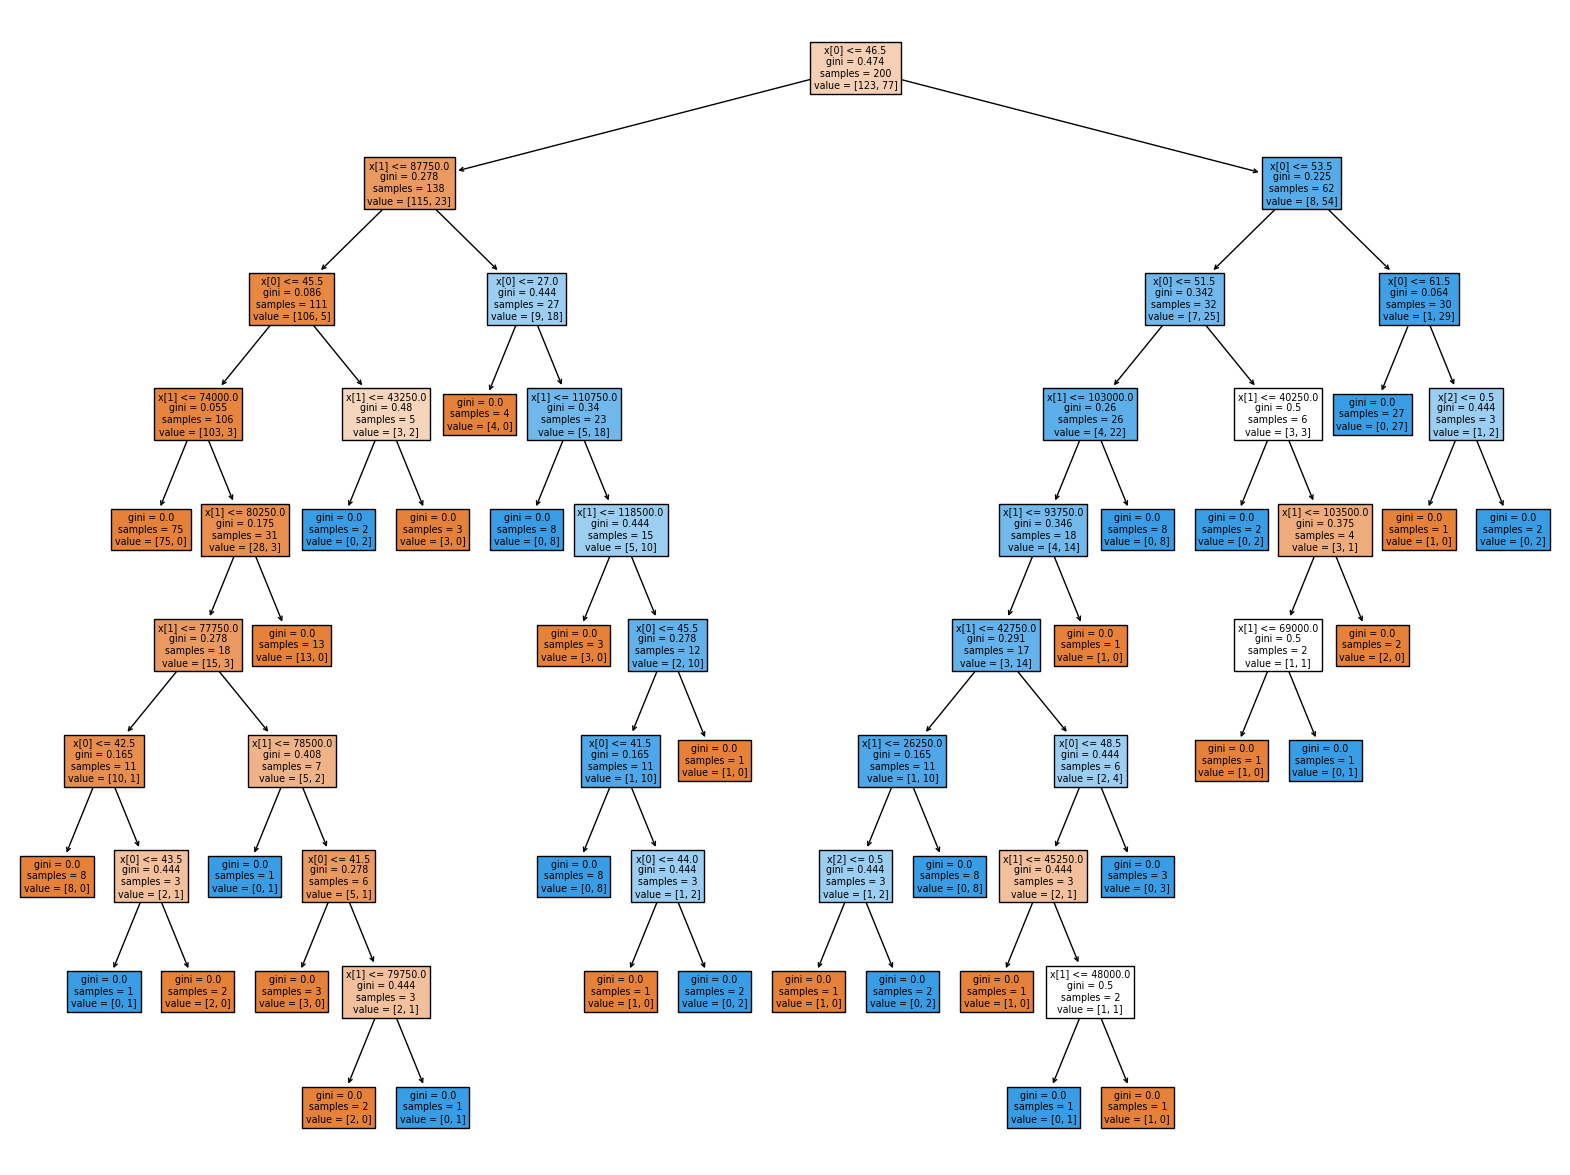

In [ ]:
plt.figure(figsize=(20,15))
plot_tree(dtc,filled=True)